
&nbsp;

#  CSB195 Lab Report 2 - Zi Qi Zhang

&nbsp;

### A Jupyter Notebook for Report 2 Assignment on "Augmented" Cellular Automata"
### CSB195, Fall 2025

&nbsp;

---
## Purpose of Notebook 
This notebook implements and analyzes an augmented cellular automaton (ACA) to model a simple ecosystem with random distribution of "resouces" initially present. The system is based on a chaotic "environment" (Rule 101) and a "species" (state 2) that follows its own rules. These rules, implemented as augmenters, include：

- Spontaneous Birth: A true "mutation" that overrides the base rule (e.g., 011 -> 2).

- Growth/Survival: The species must "eat" resources (state 1) to survive (12 -> 22 / 21 -> 22).

- Death (Overcrowding): A "negative selection" force that culls dense populations (222 -> 0). This controls the amount of species (stage 2)


The system is defined by:
1.  **An Environment:** A class three "chaotic" background (Rule 101) that randomly provides "resources" (state 1).

2.  **A Species:** A new "species" (state 2) that follows its own rules.

3.  **Spontaneous Generation** A new "species" is formed by (`011`) in the previous line 

3.  **Positive Selection (Birth):** The species "eats" resources (`1`) to reproduce (`2`).

4.  **Negative Selection (Death):** The species "dies" (`0`) if it becomes locally overcrowded (no `1` adjcent to it).



## Results

The experiment was successful. The resulting trajectory shows that the "Spontaneous Birth" rule (acting on the 011 pattern) successfully creates "mutations" (state 2) that are sustained.

### Qualatative Results

State 2 "species" spawn as quickly as in the second step. State 2 cells are initially abundant and randomly dispersed in around the first 30 steps. After 30 steps, state 2 cells quickly decline, and individual lineages begin forming. At 100 steps, indivudal lineages can be clearly identified.

These lineages persist as "gliders" or "particles," moving diagonally through the chaotic Rule 101 background. Interestingly, the slope at which lineages travel downwards is unpredictably different. Each lineage travels by different patterns of glidders that also appear unpredictable. 

At unpredicatble points in space-time, a lineage can suddenly become extinct (i.e. it doesn't continue). The maximum time to which lineages can persist for varies with the width, the maximum step, and the seed (cell 3). For width 401 and seed 13673578 used in quantatative analysis, the longest lineage stretching from top-right to bottom left nearly made it through the entire rendered illustration, stopping only when it reached the left boundary. 

Lineages can perform merging or diverging behavior. 

When a lineage goes extinct, whether it be before or after 30 steps in space-time, the automaton produces three kinds of stable, verticel patterns that persist forever. This exhibits the process of a class 4 rule changing into a class 2 rule, where the glidding patterns generated by species becomes, at an unpredictable point, stable, local patterns that persist indefinetly. 


### Quantatative Analysis with Cell 6

Global Configuration used for analysis:
- Rule 101
- width 401
- steps 800
- seed 13673578

Firstly, the block entropy / compression diagram depicts that the 2D block entropy is intermediate and the compression ratio is not minimal, comfirming the system is not simple or periodic but exhibits "Class-4-like dynamics". 

The density of state 1 and 2 cells are consistant with what is qualatatively observed. The density of state 2 cells rapidly increase in the first few steps and drastically oscilliate. Their density declines significantly as steps proceed to 100, corresponding to when the chaos of state 2 cells disappear and individual lineages are distinct. The stabiility of patterns formed by extinct can also be verfied by the overall constant densities of both state 1 and 2 cells after 200 steps. The entropy diagram also confirms the gradual stabalization of the world as lineages become extinct with more steps. 

The spatial correlation diagram provides important insights on merging and diverging behavior of lineages. The correlation length of state 2 cells remain high before around 50 steps, suggesting high degrees of clumpiness and disorder. As step count approach 100, the correlation of neibourghing cells decrease as individual lineages form. However, spikes in correlation length at around 250, 280, and 300 steps provide quantatative evidence for merging or diverging of different lineages that interupt the orginally independent lineages that do not exhibit any correlation with its stable surroundings. 


## Discussion

In this model, the gliders are "fragile"; as observed, they go extinct at unpredictable times. This is consistent with the "Starvation" model, where a glider dies if it fails to find "food" (state 1) in the chaotic environment. 

The novelty of this augmentor is its ability to construct lineages from complete choas. Without augmentation, rule 101 is a class 3 rule exhibiting chaos. The "mutation" applied in this model is changing "011" from becoming "0" to "2", which metaphorically generates a new species. Additionally, growth and death rules governed by the availablility of state 1 cells serving as a "resource" for the species stimulates that of real ecosystems, serving to control the abundance of species in the world. 

The most unexpected element of this model was the ability for this augmentation to both form distinct, unique, and persisting lineages while also causing extinction of lineages, all in a completely unpredicatble manner. This model exemplifies complex interaction between state 2 cell lineages and the state 1 cell environment. Even more interesting, different 

Unfortunately, cellular automaton lack the function for probabilities to be considered when actvating an effect upon meeting certain conditions. For this reason, the probabilistic nature of mutations cannot be fully depicted in this model. The only instance reflecting the probabilistic nature during the initial phase, where randomness is generated from the seed. 

Permananet extinction leading to class 2 behavior is another limitation to this model. When one region becomes extinct, there lacks a mechanism to regenerate lineages. Thus spontaneous generation of species can only occur during the initial, chaotic phase, but not in later phases. The system also lacks the ability to exhibit "adaptive radiation" from one lineage when neibourghing lineages become extinct. Thus, this model always depicts a "mass and unrecoverable extinction of species". In contrast to reality, taking the Cenozoic radiation of placental mammals following the extinction of dinosaurs as an example, would lead to other species taking advantage of the ecological opportunity, and re-consuming the available enviornmental capacity (Brocklehurst et al. 2021). 

Overall, this model successfully simulates the formation, persistance, and extinction of species lineages in an ecosystem, but is unable to exhibit spontaneous, probabilitic mutations or adaptive radiation. 


## Generative AI Conversation Links 

https://gemini.google.com/share/19606437fde9

My Contributions
- Proposing ideas for a complex ACA 
- Experimenting with different rules, augmentations, and seeds to find interesting behavior
- Writing the analysis of results
- Writing the discussion

AI Contributions
- Suggesting practical solutions to my ideas
- Providing me with code
- Teaching me what each graph generated by cell 6 means


## References
Brocklehurst, Neil, Elsa Panciroli, Gemma Louise Benevento, and Roger B.J. Benson. 2021. “Mammaliaform Extinctions as a Driver of the Morphological Radiation of Cenozoic Mammals.” Current Biology 31 (13): 2955-2963.e4. https://doi.org/10.1016/j.cub.2021.04.044.

---


In [ ]:
# =====================================================================
# CELL 1: Import required libraries, install missing, sanity check
# =====================================================================

import subprocess, sys, importlib

# External packages used in this notebook
REQUIRED_PACKAGES = ['numpy', 'matplotlib', 'tqdm']  

print(f"Checking for required packages: {', '.join(REQUIRED_PACKAGES)}...")

for package in REQUIRED_PACKAGES:
    try:
        importlib.import_module(package)
        print(f"'{package}' found.")
    except ImportError:
        print(f"'{package}' not found. Attempting installation...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"'{package}' installed successfully.")
        except Exception as e:
            print(f"ERROR: Could not install '{package}'. Please run 'python -m pip install {package}' manually.")
            raise e

# Final imports (after ensuring availability)
import numpy as np
import matplotlib
matplotlib.use("module://matplotlib_inline.backend_inline")  # inline figures in notebook
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from pathlib import Path
from IPython.display import display

# Sanity info
print("All dependencies are ready.")
print("NumPy:", np.__version__)
print("Matplotlib:", plt.matplotlib.__version__)

# Simple capability check: filesystem writability
out_dir = Path("./ACA_outputs")
out_dir.mkdir(exist_ok=True)
print("Output directory:", out_dir.resolve())
print("Filesystem writable:", out_dir.exists() and out_dir.is_dir())


Checking for required packages: numpy, matplotlib, tqdm...
'numpy' found.
'matplotlib' found.
'tqdm' found.
All dependencies are ready.
NumPy: 2.3.3
Matplotlib: 3.10.6
Output directory: /Users/ziqizhang/Documents/Documents - Rainchng's MacBook Air/CSB195/src/report2/ACA_outputs
Filesystem writable: True


In [ ]:
n REQUIRED_PACKAGES:
    try:
        importlib.import_module(package)
        print(f"'{package}' found.")
    except ImportError:
        print(f"'{package}' not found. Attempting installation...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"'{package}' installed successfully.")
        except Exception as e:
            print(f"ERROR: Could not install '{package}'. Please run 'python -m pip install {package}' manually.")
            raise e

# Final imports (after ensuring availability)
import numpy as np
import matplotlib
matplotlib.use("module://matplotlib_inline.backend_inline")  # inline figures in notebook
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from pathlib import Path
from IPython.display import display

# Sanity info
print("All dependencies are ready.")
print("NumPy:", np.__version__)
print("Matplotlib:", plt.matplotlib.__version__)

# Simple capability check: filesystem writability
out_dir = Path("./ACA_outputs")
out_dir.mkdir(exist_ok=True)
print("Output directory:", out_dir.resolve())
print("Filesystem writable:", out_dir.exists() and out_dir.is_dir())


In [56]:
# =====================================================================
# CELL 2: Helper functions (lots of)
# =====================================================================

from dataclasses import dataclass, asdict
from typing import Literal, Dict, Any
from pathlib import Path
import numpy as np
import json
import base64
import webbrowser, os


NeighborhoodOrderDoc = "Neighborhood bit ordering is 111,110,101,100,011,010,001,000 (Wolfram canonical)."

def rule_to_bitstring(rule: int) -> str:
    """
    Convert Wolfram ECA rule number (0..255) to an 8-char '0'/'1' bitstring.
    Order: 111,110,101,100,011,010,001,000 (MSB for '111').
    """
    if not (0 <= rule <= 255):
        raise ValueError("Rule must be in [0, 255].")
    return format(rule, '08b')


def bitstring_to_rule(bits: str) -> int:
    """
    Convert an 8-char '0'/'1' bitstring (ordered 111..000) to Wolfram rule int.
    """
    if len(bits) != 8 or any(c not in '01' for c in bits):
        raise ValueError("Bitstring must be 8 chars of '0'/'1'.")
    return int(bits, 2)

# Precompute mapping from neighborhood (3-bit index) to output for speed
def _rule_lookup(rule: int) -> np.ndarray:
    bits = rule_to_bitstring(rule)
    # map order 111..000 to integer indices 7..0
    return np.array([int(ch) for ch in bits], dtype=np.uint8)

def apply_rule(neighborhood: tuple[int, int, int], rule: int) -> int:
    """
    Core ECA transition for a single neighborhood.
    Any non-zero inputs are treated as 1.
    """
    l, c, r = (1 if x else 0 for x in neighborhood)  # booleanize
    idx = (l << 2) | (c << 1) | r                    # 0..7 for 111..000 is 7..0
    return int(_rule_lookup(rule)[7 - idx])          # flip to align 111..000

def make_lookup(rule: int) -> np.ndarray:
    """Precompute 8-bit lookup (ordered 111,110,...,000)."""
    return _rule_lookup(rule)

def eca_next(row: np.ndarray, boundary: str, lookup: np.ndarray) -> np.ndarray:
    """
    Vectorized one-step ECA update for an entire row.
    Any non-zero value in `row` counts as 1 (True) for rule evaluation.
    Returns uint8 array with values in {0,1}.
    """
    # --- PATCH: booleanize once, then build neighborhoods on the mask ---
    rb = (row != 0).astype(np.uint8)

    if boundary == 'periodic':
        L = np.roll(rb, +1); C = rb; R = np.roll(rb, -1)
    elif boundary == 'fixed':
        W = rb.shape[0]
        L = np.empty_like(rb); L[0]  = 0; L[1:]  = rb[:-1]
        C = rb
        R = np.empty_like(rb); R[-1] = 0; R[:-1] = rb[1:]
    else:
        raise ValueError("Unknown boundary. Use 'periodic' or 'fixed'.")

    # index 0..7 (00b..111b) computed from booleanized bits
    idx = (L << 2) | (C << 1) | R
    # lookup[0] == output for '111', lookup[7] for '000' → use 7-idx
    return lookup[7 - idx].astype(np.uint8)

# (nice-to-have convenience wrapper)
def eca_step(row: np.ndarray, rule: int, boundary: str = 'periodic') -> np.ndarray:
    """Convenience wrapper (uses booleanized evaluation as above)."""
    return eca_next(row, boundary, make_lookup(rule))


@dataclass               # Using the @dataclass "decorator" to simplify the creation of ...
class World:             # ... the class "World".
    width: int
    steps: int           # a state has steps+1 rows (including t0)
    rule: int            # the Wolfram code that makes this world
    boundary: Literal['periodic','fixed'] = 'periodic'
    seed: int | None = None
    init_mode: Literal['single_on_center','random'] = 'single_on_center'
    init_density: float = 0.5
    palette: Dict[int, str] | None = None
    # the two planes
    state: np.ndarray | None = None
    appearance: np.ndarray | None = None

    def __post_init__(self):
        # --- Require a palette (fail fast) ---
        if self.palette is None:
            raise ValueError(
                "World.palette is required. Define PALETTE in Cell 3 and pass it to World(...). "
                "Example: {0:'#FFFFFF', 1:'#427dae'}"
            )
        _validate_palette(self.palette)  # see helper below
        # Eagerly allocate arrays (the state- and appearance- planes)
        if self.state is None:
            self.state = np.zeros((self.steps + 1, self.width), dtype=np.uint8)
        if self.appearance is None:
            self.appearance = np.zeros((self.steps + 1, self.width), dtype=np.int16)

    # --- JSON (de)serialization helpers ---
def save_world_json(world: World, path: str | Path) -> Path:
    # unchanged usage; __post_init__ guarantees arrays exist
    p = Path(path)
    p.parent.mkdir(parents=True, exist_ok=True)
    with p.open('w', encoding='utf-8') as f:
        json.dump(world.to_json_dict(), f)
    return p

def load_world_json(path: str | Path) -> World:
    with Path(path).open('r', encoding='utf-8') as f:
        d = json.load(f)
    w = World(
        width=int(d['width']),
        steps=int(d['steps']),
        rule=int(d['rule']),
        boundary=d.get('boundary', 'periodic'),
        seed=d.get('seed', None),
        init_mode=d.get('init_mode', 'single_on_center'),
        init_density=float(d.get('init_density', 0.5)),
        palette=d.get('palette', {0: "#FFFFFF", 1: "#427dae", 2: "#ffc107"})
    )
    # Overwrite with stored arrays
    w.state = np.array(d['state'], dtype=np.uint8)
    w.appearance = np.array(d['appearance'], dtype=np.int16)
    return w


def save_world_json(world: World, path: str | Path) -> Path:
    p = Path(path)
    p.parent.mkdir(parents=True, exist_ok=True)
    with p.open('w', encoding='utf-8') as f:
        json.dump(world.to_json_dict(), f)
    return p

def load_world_json(path: str | Path) -> World:
    p = Path(path)
    with p.open('r', encoding='utf-8') as f:
        d = json.load(f)
    return World.from_json_dict(d)

# --- Validators ---
def _validate_palette(palette: dict[int, str]) -> None:
    if not isinstance(palette, dict):
        raise ValueError("Palette must be a dict mapping int -> hex color string.")
    for k, v in palette.items():
        if not isinstance(k, int):
            raise ValueError(f"Palette key {k!r} is not int.")
        if not (isinstance(v, str) and v.startswith('#') and len(v) in (7, 9)):
            raise ValueError(f"Palette value for key {k} must be '#RRGGBB' or '#RRGGBBAA', got {v!r}.")
        try:
            int(v[1:], 16)
        except Exception:
            raise ValueError(f"Palette color {v!r} is not valid hex.")
    # strictly require keys 0 and 1 
    required = {0, 1}
    missing = required - set(palette.keys())
    if missing:
        raise ValueError(f"Palette is missing required indices: {sorted(missing)}")


# --- HTML rendering: write a self-contained viewer and (optionally) open it ---
def render_html_view(world: World, out_html: str | Path) -> Path:
    import time, os

    t0 = time.perf_counter()
    
    # Choose byte width: 1 byte is enough if your palette indices < 256.
    max_index = int(np.max(world.appearance))
    dtype = np.uint8 if max_index < 256 else np.uint16
    appearance_flat = world.appearance.astype(dtype, copy=False).ravel(order="C")
    b64 = base64.b64encode(appearance_flat.tobytes()).decode("ascii")
    t1 = time.perf_counter()
    
    data_small = {
        "dtype": "u8" if dtype is np.uint8 else "u16",
        "width": world.width,
        "rows": world.steps + 1,
        "palette": world.palette,
        "meta": {
            "rule": world.rule,
            "boundary": world.boundary,
            "seed": world.seed,
            "init_mode": world.init_mode,
            "init_density": world.init_density
        }
    }
    html_template = f"""<!doctype html>
<html>
<head>
<meta charset="utf-8">
<title>ACA Trajectory (Rule {world.rule})</title>
<style>
  body {{ margin: 0; font-family: system-ui, -apple-system, Segoe UI, Roboto, Arial, sans-serif; }}
  #bar {{ padding: 8px 12px; display: flex; gap: 12px; align-items: center; border-bottom: 1px solid #ddd; }}
  #info {{ font-size: 14px; opacity: .8; }}
  #canvas {{ display: block; }}
  button, input {{ font-size: 14px; }}
  .mono {{ font-family: ui-monospace, SFMono-Regular, Menlo, Consolas, monospace; }}
</style>
</head>
<body>
  <div id="bar">
    <span id="info"></span>
    <label>Scale: <input id="scale" type="number" step="1" min="1" value="4" style="width:60px;"></label>
    <button id="fit">Fit to window</button>
    <button id="square">Square pixels</button>
    <span class="mono">Palette: {json.dumps(world.palette)}</span>
  </div>
  <canvas id="canvas"></canvas>
  <script id="appearance_b64" type="application/octet-stream">
  {b64}
  </script>
<script>
const data = {json.dumps(data_small)};   
const canvas = document.getElementById('canvas');
const ctx = canvas.getContext('2d', {{alpha:false}});
const info = document.getElementById('info');
const scaleInput = document.getElementById('scale');

const rows = data.rows, cols = data.width, palette = data.palette;

// ---- decode base64 -> typed array (flat A of length rows*cols) ----

const b64 = document.getElementById('appearance_b64').textContent.trim();

function b64ToUint8(b64) {{
  const bin = atob(b64);
  const out = new Uint8Array(bin.length);
  for (let i = 0; i < bin.length; i++) out[i] = bin.charCodeAt(i);
  return out;
}}

console.time("decode");
const buf8 = b64ToUint8(b64);
const A = (data.dtype === "u8") ? buf8 : new Uint16Array(buf8.buffer);
console.timeEnd("decode");
console.log("A length:", (data.dtype==="u8"?buf8.length:new Uint16Array(buf8.buffer).length), "expected:", rows*cols);


// ---- palette packed to Uint32 (AABBGGRR in little-endian) ----
function hexToRgba(hex) {{
  hex = String(hex).trim().replace(/^#/, '');
  if (hex.length === 3)  hex = hex.split('').map(c => c+c).join('') + 'FF';
  else if (hex.length === 4) hex = hex.split('').map(c => c+c).join('');
  else if (hex.length === 6) hex += 'FF';
  if (hex.length !== 8) return [0,0,0,255];
  return [
    parseInt(hex.slice(0,2),16), parseInt(hex.slice(2,4),16),
    parseInt(hex.slice(4,6),16), parseInt(hex.slice(6,8),16)
  ];
}}
const maxKey = Math.max(...Object.keys(palette).map(k => parseInt(k,10)));
const pal32 = new Uint32Array(maxKey + 1);
for (const [k,v] of Object.entries(palette)) {{
  const [r,g,b,a] = hexToRgba(v);
  pal32[parseInt(k,10)] = (a<<24)|(b<<16)|(g<<8)|(r<<0);
}}

// ---- 1× base canvas + fast draw (then scale) ----
const base = document.createElement('canvas');
const bctx = base.getContext('2d', {{alpha:true}});
base.width = cols; base.height = rows;

function draw(scale) {{
  const img = bctx.createImageData(cols, rows);
  const buf32 = new Uint32Array(img.data.buffer);
  let p = 0;
  for (let y = 0; y < rows; y++) {{
    const rowOff = y * cols;
    for (let x = 0; x < cols; x++) {{
      buf32[p++] = pal32[A[rowOff + x]] || 0xFF000000;
    }}
  }}
  bctx.putImageData(img, 0, 0);

  canvas.width = cols * scale;
  canvas.height = rows * scale;
  ctx.imageSmoothingEnabled = false;
  ctx.drawImage(base, 0, 0, canvas.width, canvas.height);

  info.textContent = "Rule " + data.meta.rule +
                     " | boundary=" + data.meta.boundary +
                     " | seed=" + data.meta.seed +
                     " | init=" + data.meta.init_mode;
}}


document.getElementById('fit').addEventListener('click', () => {{
  const sX = Math.max(1, Math.floor(window.innerWidth / cols));
  const sY = Math.max(1, Math.floor((window.innerHeight-48) / rows));
  const s = Math.max(1, Math.min(sX, sY));
  scaleInput.value = s;
  draw(s);
}});

document.getElementById('square').addEventListener('click', () => {{
  const s = parseInt(scaleInput.value || '4', 10);
  draw(Math.max(1, s));
}});

scaleInput.addEventListener('change', () => {{
  const s = parseInt(scaleInput.value || '4', 10);
  draw(Math.max(1, s));
}});

console.time("draw");
draw(parseInt(scaleInput.value, 10));
console.timeEnd("draw");


</script>
</body>
</html>"""

    t2 = time.perf_counter()
    
    out_html = Path(out_html)
    out_html.parent.mkdir(parents=True, exist_ok=True)
    out_html.write_text(html_template, encoding='utf-8')

    size_kb = os.path.getsize(out_html) / 1024
    t3 = time.perf_counter()
    
    print(f"[render_html_view] b64: {(t1-t0)*1000:.1f} ms | template: {(t2-t1)*1000:.1f} ms | write: {(t3-t2)*1000:.1f} ms | size: {size_kb:.1f} KB")
    
    return out_html


def open_html(path: str | Path):
    """Try to open the given HTML file in a new browser tab/window (local setups)."""

    import time, webbrowser
    
    url = Path(path).resolve().as_uri()

    t0 = time.perf_counter()
    ok = webbrowser.open_new_tab(url)
    t1 = time.perf_counter()
    print(f"[open_html] launch: {(t1-t0)*1000:.1f} ms | ok={ok} | URL: {url}")
    print("Opened in browser:" if ok else "Could not auto-open; open manually:", url)

# --- Utility: prettify a rule ---
def describe_rule(rule: int) -> str:
    bits = rule_to_bitstring(rule)
    return f"Rule {rule} (bits {bits}) | {NeighborhoodOrderDoc}"

def parse_grid(g) -> np.ndarray:
    """
    Accepts:
      - "1011"  (1×W string)
      - "10\\n11" (H×W string, bottom line is 'now')
      - np.ndarray[int] (H×W or (W,) -> coerced to (1×W))
    Returns: int ndarray of shape (H, W) with values as given (no coercion to {0,1}).
    """
    if isinstance(g, np.ndarray):
        arr = g.astype(int, copy=False)
        if arr.ndim == 1:
            arr = arr[np.newaxis, :]
        elif arr.ndim != 2:
            raise ValueError("Grid ndarray must be 1D or 2D.")
        return arr
    if not isinstance(g, str):
        raise ValueError("Grid must be a string or numpy array.")
    # Split lines; ignore empty lines; bottom line is 'now'
    rows = [ln.strip() for ln in g.strip().splitlines() if ln.strip() != ""]
    if len(rows) == 1 and all(ch in "0123456789" for ch in rows[0]):
        data = [[int(ch) for ch in rows[0]]]
    else:
        data = [[int(ch) for ch in ln] for ln in rows]
    # Validate rectangular
    Wset = {len(r) for r in data}
    if len(Wset) != 1:
        raise ValueError("All grid rows must have same width.")
    return np.array(data, dtype=int)

def _candidate_anchors(width: int, patch_width: int, periodic: bool) -> np.ndarray:
    if periodic:
        return np.arange(width, dtype=int)
    # non-periodic: only anchors fully inside the segment
    max_start = width - patch_width
    if max_start < 0:
        return np.empty(0, dtype=int)
    return np.arange(max_start + 1, dtype=int)

def _slice_x(arr_row: np.ndarray, x0: int, w: int, periodic: bool) -> np.ndarray:
    """Return arr_row[x0:x0+w] with wrap if periodic; caller guarantees bounds otherwise."""
    W = arr_row.shape[0]
    if periodic:
        idx = (np.arange(x0, x0 + w) % W)
        return arr_row[idx]
    else:
        # out-of-bounds anchors must not be produced upstream
        return arr_row[x0:x0 + w]

def match_at_t(world, plane: str, t: int, pattern: np.ndarray) -> np.ndarray:
    """
    Find anchors x0 where pattern (H×W) matches rows [t-H+1 ... t] on the given plane.
    Inherits wrap from world.boundary. Returns int array of anchors (possibly empty).
    """
    if plane not in ("state", "appearance"):
        raise ValueError("plane must be 'state' or 'appearance'")
    pat = parse_grid(pattern)
    H, Wp = pat.shape
    if t + 1 < H:
        return np.empty(0, dtype=int)

    A = getattr(world, plane)  # shape (steps+1, width)
    width = world.width
    periodic = (world.boundary == 'periodic')

    anchors = _candidate_anchors(width, Wp, periodic)
    if anchors.size == 0:
        return anchors

    # Start with all candidates valid; knock out mismatches row by row
    ok = np.ones(anchors.shape[0], dtype=bool)
    # rows in the world corresponding to pattern rows (top..bottom) = (t-H+1 .. t)
    row_indices = range(t - H + 1, t + 1)

    for h, r in enumerate(row_indices):
        row = A[r]  # (width,)
        # Build window slices for all candidate anchors
        # windows[k] = row slice at anchor k (length Wp)
        if periodic:
            idx = (anchors[:, None] + np.arange(Wp)) % width  # shape (K, Wp)
            windows = row[idx]                                # shape (K, Wp)
            eq = np.all(windows == pat[h], axis=1)            # (K,)
        else:
            # In non-periodic, anchors already in-bounds
            # vectorized gather via broadcasting
            idx = anchors[:, None] + np.arange(Wp)            # (K, Wp)
            windows = row[idx]
            eq = np.all(windows == pat[h], axis=1)
        ok &= eq
        if not ok.any():
            return np.empty(0, dtype=int)
    return anchors[ok]

def match_at_row(world, plane: str, t_ref: int, pattern: np.ndarray) -> np.ndarray:
    """
    Find anchors x0 where pattern (H×W) matches rows [t_ref-H+1 ... t_ref] on plane.
    """
    if plane not in ("state", "appearance"):
        raise ValueError("plane must be 'state' or 'appearance'")
    pat = parse_grid(pattern)
    H, Wp = pat.shape
    if t_ref + 1 < H:
        return np.empty(0, dtype=int)

    A = getattr(world, plane)
    width = world.width
    periodic = (world.boundary == 'periodic')

    anchors = _candidate_anchors(width, Wp, periodic)
    if anchors.size == 0:
        return anchors

    ok = np.ones(anchors.shape[0], dtype=bool)
    for h, r in enumerate(range(t_ref - H + 1, t_ref + 1)):
        row = A[r]
        if periodic:
            idx = (anchors[:, None] + np.arange(Wp)) % width
            windows = row[idx]
        else:
            idx = anchors[:, None] + np.arange(Wp)
            windows = row[idx]
        ok &= np.all(windows == pat[h], axis=1)
        if not ok.any():
            return np.empty(0, dtype=int)
    return anchors[ok]

    
def apply_patch(world, plane: str, t: int, x0: int, patch: np.ndarray) -> None:
    """
    Overwrite rows [t-H+1 ... t], columns [x0 ... x0+W-1] with 'patch' (H×W).
    Wraps horizontally if world.boundary == 'periodic'. Fail-fast on invalid palette indices.
    """
    if plane not in ("state", "appearance"):
        raise ValueError("plane must be 'state' or 'appearance'")
    P = parse_grid(patch)
    H, Wp = P.shape
    if t + 1 < H:
        return  # not enough history yet
    A = getattr(world, plane)
    width = world.width
    periodic = (world.boundary == 'periodic')

    # Appearance palette coverage (fail-fast)
    if plane == "appearance":
        palette_keys = set(world.palette.keys())
        used = set(int(v) for v in np.unique(P))
        if not used.issubset(palette_keys):
            missing = sorted(used - palette_keys)
            raise ValueError(f"Appearance patch uses indices not in palette: {missing}")

    # Write row by row (vectorized along x via index arrays)
    for h, r in enumerate(range(t - H + 1, t + 1)):
        if periodic:
            idx = (np.arange(x0, x0 + Wp) % width)
            A[r, idx] = P[h]
        else:
            if x0 < 0 or x0 + Wp > width:
                # out-of-bounds anchors should not have been produced
                continue
            A[r, x0:x0 + Wp] = P[h]


# ---- World factory (fresh world from config) ----
def init_world() -> World:
    """(Re)initialize the World using globals defined in Cell 3."""
    global WIDTH, STEPS, RULE, BOUNDARY, RANDOM_SEED, INIT_MODE, INIT_DENSITY, PALETTE

    world = World(width=WIDTH, steps=STEPS, rule=RULE, boundary=BOUNDARY,
                  seed=RANDOM_SEED, init_mode=INIT_MODE,
                  init_density=INIT_DENSITY, palette=PALETTE)

    rng = np.random.default_rng(RANDOM_SEED) if RANDOM_SEED is not None else np.random.default_rng()

    if INIT_MODE == 'single_on_center':
        t0 = np.zeros(WIDTH, dtype=np.uint8)
        t0[WIDTH // 2] = 1
    elif INIT_MODE == 'random':
        if not (0.0 <= INIT_DENSITY <= 1.0):
            raise ValueError("INIT_DENSITY must be in [0,1].")
        t0 = (rng.random(WIDTH) < INIT_DENSITY).astype(np.uint8)
    else:
        raise ValueError(f"Unknown INIT_MODE: {INIT_MODE}")

    world.state[0] = t0
    world.appearance[0] = t0.astype(np.int16)

    print(describe_rule(RULE))
    print(f"World initialized: width={WIDTH}, steps={STEPS}, boundary={BOUNDARY}, "
          f"init={INIT_MODE}, seed={RANDOM_SEED}")
    return world


# ---- Prepare augmenters, merging pal_add with optional recolor ----
def prepare_augmenters(world: World, augs: list[dict]) -> list[dict]:
    prepped, additions = [], {}
    for i, spec in enumerate(augs):
        if not spec.get("enable", True):
            continue

        # palette additions (as before)
        for k, v in (spec.get("pal_add") or {}).items():
            k, v = int(k), str(v)
            if k in additions and additions[k] != v:
                raise ValueError(f"Augmenter {i} conflicts on palette[{k}]")
            additions[k] = v

        # normalize apply to a list
        applies = spec.get("apply")
        if isinstance(applies, dict):
            applies = [applies]
        if not isinstance(applies, list) or not applies:
            raise ValueError(f"Augmenter {i}: 'apply' must be a dict or nonempty list of dicts.")

        # parse grids & offsets
        m = spec["match"]
        pat = parse_grid(m["grid"])
        m_row_off = int(m.get("row_offset", 0))

        parsed_applies = []
        for a in applies:
            trg = a["grid"]
            if isinstance(trg, str) and len(trg) >= 2 and trg[0] in "+-" and trg[1:].isdigit():
                appl = pat + int(trg)
            else:
                appl = parse_grid(trg)
            if appl.shape != pat.shape and appl.shape != (1,1):
                # allow 1×1 “paint here” patches; otherwise shapes must match
                raise ValueError(f"Augmenter {i}: pattern/apply shape mismatch: {pat.shape} vs {appl.shape}")
            parsed_applies.append({
                "plane": a["plane"],
                "grid": appl,
                "row_offset": int(a.get("row_offset", 0)),
                "dx": int(a.get("x_offset", 0)), 
            })

        prepped.append({
            "match_plane": m["plane"],
            "pattern": pat,
            "match_row_offset": m_row_off,
            "applies": parsed_applies,
        })

    if additions:
        merged = {**world.palette, **additions}
        _validate_palette(merged)
        for k, v in additions.items():
            if k in world.palette and world.palette[k] != v:
                raise ValueError(f"Palette[{k}] already {world.palette[k]!r}, not {v!r}.")
        world.palette.update(additions)

    return prepped

def run_augmenters(world: World, t_now: int, prepared: list[dict]) -> None:
    for spec in prepared:
        t_match = t_now + spec.get("match_row_offset", 0)
        anchors = match_at_row(world, spec["match_plane"], t_match, spec["pattern"])
        if anchors.size == 0:
            continue
        periodic = (world.boundary == 'periodic')
        W = world.width
        for x0 in anchors.tolist():
            for ap in spec["applies"]:
                t_apply = t_now + ap.get("row_offset", 0)
                dx = ap.get("dx", 0)
                x_apply = (x0 + dx) % W if periodic else (x0 + dx)
                # (Optional) guard fixed boundary writes that fall off the edge
                if not periodic and (x_apply < 0 or x_apply >= W):
                    continue
                apply_patch(world, ap["plane"], t_apply, x_apply, ap["grid"])                


KeyboardInterrupt: 

In [59]:

# ================================================================
# CELL 3: World definition & initialization
# ================================================================

# Parameters for our Population Equilibrium model
WIDTH  = 401           # spatial width (x) - Non-power-of-2 to avoid singularities
STEPS  = 800           # number of time steps (y) - Long enough to see equilibrium
RULE   = 101          # Wolfram code (The chaotic "environment" [cite: 13])
BOUNDARY = 'fixed'     # 'periodic' or 'fixed' (Assignment Requirement )
RANDOM_SEED = 13673578   # for reproducible randomness
INIT_MODE = 'random'   # 'single_on_center' or 'random' (Assignment Requirement [cite: 22])
INIT_DENSITY = 0.5     # used only for 'random'

# PALETTE with which to render the Appearance plane
# We must add state 2 for our "species"
PALETTE = {0: "#FFFFFF",   # state 0 -> "Empty Space" / "Dead"
           1: "#427dae",   # state 1 -> "Resource" (from Rule 101)
           2: "#dd0044",   # state 2 -> "Species" (red)
          }

print("Global parameters initialized.")

Global parameters initialized.


In [60]:

# ================================================================
# CELL 4: Processing — evolve the CA
#         This cell defines AUGMENTERS — small pattern-based rules
#         that AUGMENT the default ECA processing. Edit/experiment here.
# ================================================================
#
# PURPOSE
#   Define ACA "augmenters": after each Wolfram update, apply pattern
#   matches and overwrite selected regions in one or both planes.
#
# CONTEXT
#   The world has two planes, each a NumPy array of shape (steps+1, width):
#     - world.state      : integer states (row 0 is t0; increasing row = later time)
#     - world.appearance : integer palette indices used for rendering
#   Key World fields (from Cell 3 config):
#     - width, steps, rule, boundary, seed, init_mode, init_density, palette
#
# PROCESS
#   - At t0, state and appearance are initialized.
#   - For each t → t+1: compute the Wolfram update from world.state[t],
#     write the result into world.state[t+1] and mirror it to appearance[t+1].
#   - Then run all ENABLED augmenters in order; they may overwrite regions
#     in world.state and/or world.appearance (now and/or past rows).
#   - Repeat until STEPS updates are complete.
#
# CONTRACT 
#   - Engine helpers prepare_augmenters(...) and run_augmenters(...) exist (Cell 2).
#     They expect each augmenter to follow the schema below.
#   - world is freshly re-initialized when this cell runs.
#   - palette additions declared via "pal_add" are merged once (fail-fast on conflicts).
#   - Augmenters are applied in order, top→bottom; later writes win on conflicts.

# AUGMENTER SCHEMA
# {
#   "enable": True,                 # False disables this augmenter
#
#   "match": {
#       "plane": "state",           # "state" or "appearance" to scan
#       "grid":  "00101010",        # 1D "0101" or 2D with newlines; bottom row aligns to reference row
#       "row_offset": 0             # optional: match relative to now (t_now + row_offset). Use -1 to look at previous row.
#   },
#
#   "apply": [                      # one or more targets; a dict or a list of dicts (both allowed)
#     {
#       "plane": "appearance",      # "state" or "appearance" to modify
#       "grid":  "00000022000000",  # replacement pattern; must match shape of 'match.grid', or be "1"×"1"
#       "row_offset": 0,            # optional: write to t_now + row_offset (default 0 = now)
#       "x_offset": 0               # optional: shift write horizontally by +k cells (use +1 to paint the center of a 3-wide match)
#     }
#   ],
#
#   "pal_add": {2: "#f22e90"}       # optional: add palette indices required by 'appearance' writes (hex #RGB/#RGBA/#RRGGBB/#RRGGBBAA)
# }

# NOTES
#   • To suppress the Wolfram update entirely, set RULE = 0 in Cell 3.
#   • Wolfram update happens first each step: state[t+1] is computed from booleanized inputs (any nonzero is True) and mirrored to appearance[t+1].
#   • Augmenters run AFTER that; they may overwrite "now" (t+1) and/or past rows, never the future.
#   • You may specify apply grids as offsets, e.g. "+2" meaning (pattern + 2).
#   • For neighborhood logic using the previous row, set match.row_offset = -1 and apply.row_offset = 0.
#     Example: match "002" at t-1 and paint a single "2" at the match center now → apply with grid = "2" and x_offset = +1.
#   • Shapes: apply.grid must match match.grid shape, except we allow a 1×1 patch for “paint here” cases.
#   • Ordering: augmenters are evaluated in list order; if two write the same cell/time, the later one wins.
#   • Matching/apply grids must have identical shape; 1D vs 2D is supported.
#   • Augmentation occurs AFTER each ECA step; it can modify "now" (row t+1) or past rows.
#     Do not rely on writing the future (it will be overwritten by the next ECA step).
#   • Palette colors accept #RGB, #RGBA, #RRGGBB, or #RRGGBBAA hex; indices must exist
#     before writing to appearance (use pal_add).
#   • Fail-fast: invalid grids, shape mismatches, unknown palette indices, or conflicting pal_add colors raise clear errors.#
#
# ================================================================

import time

world = init_world()


# -------------------- POPULATION EQUILIBRIUM AUGMENTERS (v4 - True Mutation) --------------------
AUGMENTERS = [
    
    # === 1. SPONTANEOUS BIRTH (True Mutation) ===
    # We now override the base rule. Rule 101 (01100101) dictates 011 -> 0.
    # We will override this "death" and turn it into a "birth" (011 -> 2).
    # This creates a new dynamic instead of just re-coloring an existing one.
   
    {   "enable": True, 
        "match": {"plane": "state", "grid": "011", "row_offset": -1}, # "Overcrowded" pattern that Rule 101 kills
        "apply": [
            {"plane": "state",      "grid": "2", "row_offset": 0, "x_offset": 1}, # Birth a "2"
            {"plane": "appearance", "grid": "2", "row_offset": 0, "x_offset": 1}  # ...and paint it
        ]
    },

    # === 2. GROWTH (Positive Selection / Survival) ===
    # A "species" (2) *must* consume a "resource" (1) to survive/grow.
    # This overwrites the base Rule 101 output at t.
    
    # Rule: 12 -> 22 (grows left by consuming 1)
    {   "enable": True, 
        "match": {"plane": "state", "grid": "12", "row_offset": -1}, # "Food" next to "species"
        "apply": [
            {"plane": "state",      "grid": "22", "row_offset": 0, "x_offset": 0}, # Overwrite state
            {"plane": "appearance", "grid": "22", "row_offset": 0, "x_offset": 0}  # Overwrite appearance
        ]
    },
    # Rule: 21 -> 22 (grows right by consuming 1)
    {   "enable": True, 
        "match": {"plane": "state", "grid": "21", "row_offset": -1}, # "Species" next to "food"
        "apply": [
            {"plane": "state",      "grid": "22", "row_offset": 0, "x_offset": 0}, # Overwrite state
            {"plane": "appearance", "grid": "22", "row_offset": 0, "x_offset": 0}  # Overwrite appearance
        ]
    },

    # === 3. DEATH (Negative Selection) ===
    # The "species" (2) dies from overcrowding.
    # This rule runs *after* Growth and will *overwrite* its output
    # if there is a 222 cluster.
    {   "enable": True, 
        "match": {"plane": "state", "grid": "222", "row_offset": -1}, # Find "overcrowding"
        "apply": [
            {"plane": "state",      "grid": "0", "row_offset": 0, "x_offset": 1}, # Center one dies
            {"plane": "appearance", "grid": "0", "row_offset": 0, "x_offset": 1}  # ...and paint it
        ]
    },
]


# --- The main method that evolves the world ---
def evolve(world: World, show_progress: bool = False) -> World:
    T = world.steps
    lookup = make_lookup(world.rule)
    prepared_augs = prepare_augmenters(world, AUGMENTERS)  # <- now in Cell 2

    iterator = range(T)
    if show_progress:
        from tqdm.auto import tqdm
        iterator = tqdm(iterator, desc="Evolving", leave=False)

    for t in iterator:
        prev = world.state[t]
        nxt  = eca_next(prev, world.boundary, lookup)

        world.state[t+1] = nxt
        world.appearance[t+1] = nxt.astype(np.int16)

        run_augmenters(world, t_now=t+1, prepared=prepared_augs)  # <- now in Cell 2

    return world

    
# --- Run the evolution and export the html that visualizes it ---
t0 = time.perf_counter()
evolve(world, show_progress=True)
print(f"evolve took {(time.perf_counter()-t0):.3f}s")


#evolve(world)
html_path = render_html_view(world, "./ACA_outputs/trajectory.html")
print("HTML written to:", Path(html_path).resolve())

# --- try to open the saved html directly from here
try:
    open_html(html_path)
except Exception as e:
    print("Could not auto-open HTML in browser:", e)


Rule 101 (bits 01100101) | Neighborhood bit ordering is 111,110,101,100,011,010,001,000 (Wolfram canonical).
World initialized: width=401, steps=800, boundary=fixed, init=random, seed=13673578


Evolving:   0%|          | 0/800 [00:00<?, ?it/s]

evolve took 0.116s
[render_html_view] b64: 0.5 ms | template: 0.0 ms | write: 0.8 ms | size: 422.5 KB
HTML written to: /Users/ziqizhang/Documents/Documents - Rainchng's MacBook Air/CSB195/src/report2/ACA_outputs/trajectory.html
[open_html] launch: 94.8 ms | ok=True | URL: file:///Users/ziqizhang/Documents/Documents%20-%20Rainchng%27s%20MacBook%20Air/CSB195/src/report2/ACA_outputs/trajectory.html
Opened in browser: file:///Users/ziqizhang/Documents/Documents%20-%20Rainchng%27s%20MacBook%20Air/CSB195/src/report2/ACA_outputs/trajectory.html


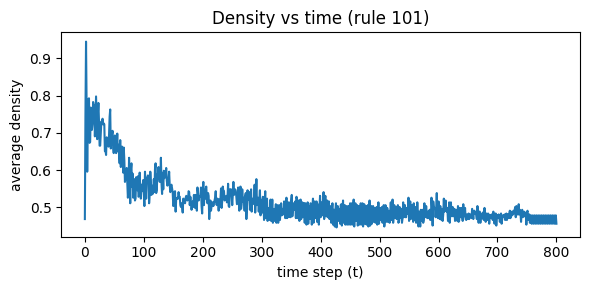

Saved: /Users/ziqizhang/Documents/Documents - Rainchng's MacBook Air/CSB195/src/report2/ACA_outputs/density.png
Total fractional density over all cells and times: 0.5170780912886324


In [61]:
# ================================================================
# CELL 5: Simple Analysis — density over time & total density
# ================================================================

import matplotlib.pyplot as plt

def density_per_step(world: World) -> np.ndarray:
    # mean of each row (fraction of '1's)
    return world.state.mean(axis=1)
    

def plot_density_vs_time(world: World, figsize=(6,3)):
    d = density_per_step(world)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.plot(np.arange(d.shape[0]), d, linewidth=1.5)
    ax.set_xlabel("time step (t)")
    ax.set_ylabel("average density")
    ax.set_title(f"Density vs time (rule {world.rule})")
    fig.tight_layout()
    # Save small figure next to HTML for convenience    
    out_png = Path("./ACA_outputs/density.png")
    fig.savefig(out_png, dpi=150)
    display(fig)
    plt.close(fig)
    print("Saved:", out_png.resolve())

def total_fractional_density(world: World) -> float:
    return float(world.state.mean())

plot_density_vs_time(world)
print("Total fractional density over all cells and times:", total_fractional_density(world))



# Information-based analysis and Interpreation (Cell 6)

The cell below computes a small **complexity dashboard** for the spacetime produced by the augmented CA.  
We report both **booleanized** statistics (treat any nonzero state as “on”) and **label-aware** statistics (that track the alternate-rule process explicitly, e.g., state==2).

## What we compute (per time step unless noted)

**Densities**
- `on(t)`: fraction of cells with state > 0 (booleanized “on”).
- `p1(t)`, `p2(t)`: fractions with state==1 and state==2, respectively.
  - *Why:* Separates the background fabric (1) from the alt track (2). If `p2` quickly drops to 0, the alt process dies out.

**Entropy**
- `H_bin(t)`: binary Shannon entropy of the row after booleanization.
  - 0 for all-0/all-1 rows; 1 for a perfectly balanced random row.
- `H_multi(t)`: multiclass entropy over the actual labels {0,1,2,…}.
  - *Why:* `H_bin` detects order vs. noise; `H_multi` shows how much “surprise” is carried specifically by the alt label.

**Spatial correlation length**
- `corr_len_bool(t)`: first lag where the row’s autocorrelation (booleanized) drops below `1/e`.
- `corr_len_alt(t)`: same but on the indicator field `1(state==2)`.
  - *Why:* Ordered domains have longer correlations; pure chaos decorrelates quickly. Class-4 regimes often show **intermediate, time-varying** correlation scales.

**Alt-front geometry**
- `count_2(t)`, `width_2(t)`, `com_2(t)` (center-of-mass), and `xmin/xmax`.
  - *Why:* A quick readout of whether the alt process persists, spreads, drifts, or fragments.

**2D block entropy (rolling)**
- `H_{h,w}(t)`: entropy of distinct `h×w` blocks over the last `h` rows (default 8×8), booleanized.
  - *Why:* Captures **spatiotemporal** variety; it rises with local pattern diversity.  
    - Low in periodic/Class-2.  
    - High but featureless in Class-3.  
    - **Intermediate/high and slowly saturating** is a common Class-4 signature (domains + interactions).

**Compression ratio (rolling)**
- `R_cmp(t)`: zlib compressed size / raw size for the last `L` rows (default 64), booleanized.
  - *Why:* A proxy for global regularity.  
    - Periodic/frozen ⇒ **very compressible** (low ratio).  
    - Random ⇒ **incompressible** (high ratio).  
    - Class-4 often sits **between** (repeating scaffolds + novel interactions).

**Row-to-row mutual information**
- `I(row_t, row_{t+1})` on booleanized rows.
  - *Why:* Measures how much information about the next row is contained in the current row.  
    - Very low in near-random regimes (Class-3).  
    - High in periodic/fixed regimes (Class-1/2).  
    - **Moderate, structured** values that fluctuate are typical of Class-4.

---

## How to read the dashboard (rules: background + seeded alt)

1. **Alt dies out quickly**
   - `p2(t) → 0`, `count_2` and `width_2` collapse.
   - `H_bin` may rise (if background is chaotic) or fall (if background is periodic).
   - `H_{8,8}` low or plateaus quickly; `R_cmp` either very low (ordered) or very high (chaotic).
   - `corr_len_bool` either grows (ordered) or stays short (chaotic).

2. **Alt persists but locks into order**
   - `p2(t)` stabilizes near a constant; `width_2` bounded.
   - `H_bin` moderate/low; `H_{8,8}` modest; `R_cmp` trends **low** (compressible).
   - Correlation lengths non-zero and often stable → Class-2-ish coexistence.

3. **Alt coexists with background chaos**
   - `p2(t)` > 0 with variability; `width_2` wanders; `com_2` drifts.
   - `H_bin` high, but `R_cmp` not maximal (some structure); `H_{8,8}` high and varies.
   - `corr_len_bool` short on average; `corr_len_alt` may show intermittent bursts → mixed Class-3/4.

4. **“Interesting” Class-4-like dynamics**
   - `p2` persists; `width_2` fluctuates; fronts collide/shed.
   - `H_{8,8}` elevated and grows with window size before saturating; `R_cmp` intermediate.
   - `corr_len_bool` and `I(row_t,row_{t+1})` are neither minimal nor maximal, and often **oscillate**.
   - Visual tell: domains, gliders/particles, defect interactions visible in the HTML trajectory.

---

## Practical tips
- Always examine **booleanized** and **label-aware** curves together.  
  Booleanized metrics answer “Is there order or chaos?”; label-aware metrics answer “Is the *alt* process doing anything nontrivial?”
- For quick triage, a single scalar:
  \[
    \text{Score}(t) = H_{8,8}(t)\;\times\; \big(1 - R_\text{cmp}(t)\big)
  \]
  High values often flag Class-4-ish windows.
- Window sizes matter: increase `h,w` or `L` to probe **larger-scale** structure; decrease to detect **local** motifs.
- Keep boundary conditions in mind (periodic vs fixed) — they affect both correlation and compressibility.

---

### Caveat
These are **heuristics**, not formal classifiers. They’re designed to be fast, interpretable, and “hackable”. For deeper theory, one can add block-entropy growth (estimate entropy rate \(h_\mu\) and excess entropy \(E\)) or information-flow measures (transfer entropy), but the above set is usually enough to separate periodic, chaotic, and “interesting” regimes for this exploratory Notebook.

---

### Note
The explanations above are minimal. But together with the code they should definitely be sufficient to get detailed information about the measures and the rationale behind them from any well-constructed AI.


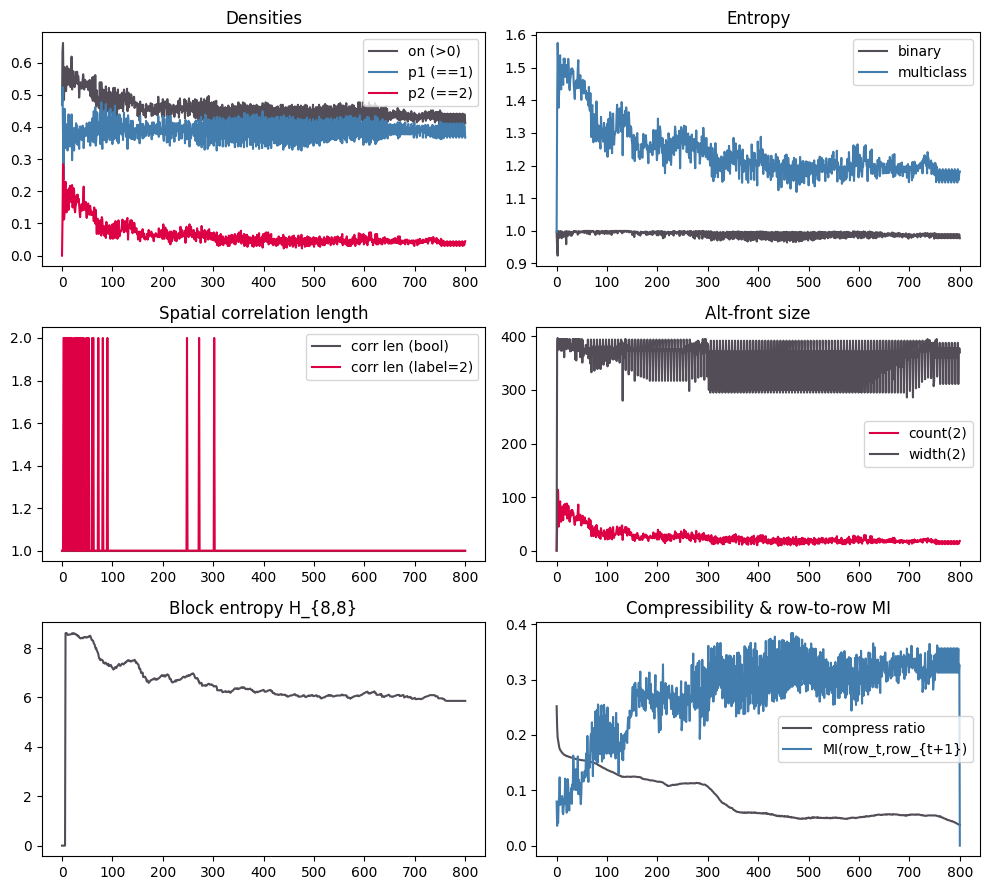

In [62]:
# ================================================================
# CELL 6: Complexity Analysis 
# ================================================================

import numpy as np
import matplotlib.pyplot as plt
import zlib

# colors, consistent with the pattern evolution
COL = {
    "state1": world.palette.get(1, "#427dae"),
    "state2": world.palette.get(2, "#dd0044"),
    "joint":  "#534D57",
    "on":     "#534D57",
}

# consistent line widths and alpha
LW  = 1.5
ALP = 1.0

def ts_density(world):
    X = world.state
    T = X.shape[0]
    on = (X > 0).mean(axis=1)
    p1 = (X == 1).mean(axis=1)
    p2 = (X == 2).mean(axis=1)
    return on, p1, p2

def ts_entropy(world):
    X = world.state
    B = (X > 0).astype(np.uint8)
    # binary entropy per row
    p = B.mean(axis=1)
    H_bin = np.where((p==0)|(p==1), 0.0, -(p*np.log2(p)+(1-p)*np.log2(1-p)))
    # multiclass entropy per row (over present labels)
    H_multi = np.empty(X.shape[0], dtype=float)
    for t,row in enumerate(X):
        vals, counts = np.unique(row, return_counts=True)
        ps = counts/row.size
        H_multi[t] = -np.sum(ps*np.log2(ps+1e-12))
    return H_bin, H_multi

def ts_corr_length(world, maxlag=128, label=None):
    """If label is None: booleanized; else: indicator for that label (e.g., 2)."""
    X = (world.state > 0).astype(np.float32) if label is None else (world.state == label).astype(np.float32)
    out = np.zeros(X.shape[0], dtype=float)
    for t,row in enumerate(X):
        r = row - row.mean()
        denom = float(np.dot(r, r)) + 1e-12
        cl = 0
        for lag in range(1, min(maxlag, row.size)):
            num = float(np.dot(r[:-lag], r[lag:]))
            if (num/denom) < 1/np.e:
                cl = lag; break
        out[t] = cl
    return out

def ts_alt_front(world, label=2):
    """Active count, min x, max x, width, center of mass for the alt label."""
    X = (world.state == label)
    T, W = X.shape
    count = X.sum(axis=1).astype(float)
    xmin = np.full(T, np.nan); xmax = np.full(T, np.nan)
    width = np.zeros(T, dtype=float); com = np.full(T, np.nan)
    xs = np.arange(W, dtype=float)
    for t in range(T):
        idx = np.flatnonzero(X[t])
        if idx.size:
            xmin[t], xmax[t] = idx[0], idx[-1]
            width[t] = xmax[t] - xmin[t] + 1
            com[t] = (idx.mean())
    return count, xmin, xmax, width, com

def block_entropy_last(world, h=8, w=8):
    """2D block entropy on the last h rows (booleanized); returns a scalar per time t >= h-1."""
    X = (world.state > 0).astype(np.uint8)
    T, W = X.shape
    if T < h or W < w:
        return np.zeros(T)
    from collections import Counter
    H = np.zeros(T)
    for t in range(h-1, T):
        slab = X[t-h+1:t+1]  # h×W
        counts = Counter()
        for x in range(0, W-w+1):
            counts[slab[:, x:x+w].tobytes()] += 1
        N = sum(counts.values())
        ps = np.fromiter((c/N for c in counts.values()), dtype=float)
        H[t] = float(-(ps*np.log2(ps+1e-12)).sum())
    return H

def compress_ratio_last(world, L=64):
    """Compression ratio on a rolling slab of the last L rows (booleanized)."""
    X = (world.state > 0).astype(np.uint8)
    T = X.shape[0]
    R = np.zeros(T)
    for t in range(T):
        a = max(0, t-L+1)
        slab = X[a:t+1]
        raw = slab.tobytes()
        comp = zlib.compress(raw, 6)
        R[t] = len(comp) / max(1, len(raw))
    return R

def mutual_info_rows(world, bins=2):
    """Plug-in MI between row t and t+1 on booleanized field."""
    B = (world.state > 0).astype(np.uint8)
    T, W = B.shape
    I = np.zeros(T)
    for t in range(T-1):
        x = B[t]; y = B[t+1]
        # joint counts
        joint = np.zeros((bins,bins), dtype=float)
        for a in (0,1):
            for b in (0,1):
                joint[a,b] = np.sum((x==a)&(y==b))
        joint /= W
        px = joint.sum(axis=1, keepdims=True)
        py = joint.sum(axis=0, keepdims=True)
        with np.errstate(divide='ignore', invalid='ignore'):
            m = joint * (np.log2(joint + 1e-12) - np.log2(px + 1e-12) - np.log2(py + 1e-12))
        I[t] = np.nansum(m)
    return I


on, p1, p2 = ts_density(world)
Hbin, Hmul = ts_entropy(world)
cl_bool = ts_corr_length(world)
cl_alt  = ts_corr_length(world, label=2)
cnt, xmin, xmax, width, com = ts_alt_front(world, label=2)
H88 = block_entropy_last(world, h=8, w=8)
Rcmp = compress_ratio_last(world, L=64)
Irow = mutual_info_rows(world)

fig, axs = plt.subplots(3,2, figsize=(10,9))
axs = axs.ravel()

axs[0].plot(on,  color=COL["on"],     lw=LW, alpha=ALP, label='on (>0)')
axs[0].plot(p1,  color=COL["state1"], lw=LW, alpha=ALP, label='p1 (==1)')
axs[0].plot(p2,  color=COL["state2"], lw=LW, alpha=ALP, label='p2 (==2)')
axs[0].set_title('Densities'); axs[0].legend()

axs[1].plot(Hbin, color=COL["joint"],  lw=LW, label='binary')
axs[1].plot(Hmul, color=COL["state1"], lw=LW, label='multiclass')
axs[1].set_title('Entropy'); axs[1].legend()

axs[2].plot(cl_bool, color=COL["joint"],  lw=LW, label='corr len (bool)')
axs[2].plot(cl_alt,  color=COL["state2"], lw=LW, label='corr len (label=2)')
axs[2].set_title('Spatial correlation length'); axs[2].legend()

axs[3].plot(cnt,   color=COL["state2"], lw=LW, label='count(2)')
axs[3].plot(width, color=COL["joint"],  lw=LW, label='width(2)')
axs[3].set_title('Alt-front size'); axs[3].legend()

axs[4].plot(H88,  color=COL["joint"], lw=LW); axs[4].set_title('Block entropy H_{8,8}')

axs[5].plot(Rcmp, color=COL["joint"],  lw=LW, label='compress ratio')
axs[5].plot(Irow, color=COL["state1"], lw=LW, label='MI(row_t,row_{t+1})')
axs[5].set_title('Compressibility & row-to-row MI'); axs[5].legend()

plt.tight_layout()
plt.show()


